In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib .pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tf_keras

2025-01-26 08:04:49.474962: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 08:04:49.671036: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 08:04:49.853549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737878690.013765   20022 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737878690.061625   20022 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 08:04:50.449468: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
IMAGE_SHAPE = (224, 224)
classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

2025-01-26 08:04:56.182104: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [4]:
gold_fish=Image.open('./goldfish.jpg').resize(IMAGE_SHAPE)

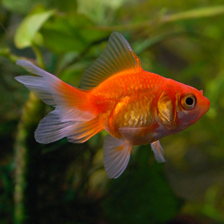

In [5]:
gold_fish

In [6]:
gold_fish=np.array(gold_fish)/255.0
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [7]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [8]:
result=classifier.predict(gold_fish[np.newaxis,...])
result.shape

1/1 [==============================] - 1s 755ms/step


(1, 1001)

In [9]:
result

array([[ 0.22101417,  2.0474906 ,  9.62256   , ..., -1.4621564 ,
        -0.28146622, -0.2598495 ]], dtype=float32)

In [10]:
predicted_label_index=np.argmax(result)
predicted_label_index

np.int64(2)

In [11]:
image_labels=[]
with open("./ImageNetLabels.txt", "r") as f:
    image_labels=f.read().splitlines()
image_labels[:5]  

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
file_path="./ImageNetLabels.txt"
if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")

File exists


In [13]:
image_labels[predicted_label_index]

'goldfish'

In [17]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2227s 10us/step


In [18]:
data_dir

'./datasets/flower_photos'

In [19]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [21]:
list(data_dir.glob('**/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/tulips/4579079143_f65b39dd9f.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/8686332852_c6dcb2e86b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/15881325303_f00807a051_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/2425067141_b27043a800_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/7205698252_b972087cc2.jpg')]

In [22]:
image_count=len(list(data_dir.glob('*/*/*.jpg')))
print(image_count)

3670


In [26]:
roses=list(data_dir.glob('*/roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/873660804_37f5c6a46e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1801614110_bb9fa46830.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1666341535_99c6f7509f_n.jpg')]

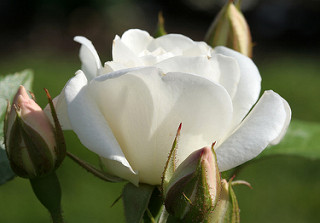

In [27]:
Image.open(str(roses[1]))

In [30]:
tulips=list(data_dir.glob('*/tulips/*'))[:5]

In [31]:
list(data_dir.glob('*/daisy/*'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/daisy/3957488431_52a447c0e8_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/5602738326_97121e007d_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3456403987_5bd5fa6ece_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/14221848160_7f0a37c395.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/8063844363_db3f4dea85.jpg')]

In [33]:
flowers_images_dict={
    'roses':list(data_dir.glob('*/roses/*')),
    'daisy':list(data_dir.glob('*/daisy/*')),
    'dandelion':list(data_dir.glob('*/dandelion/*')),
    'sunflowers':list(data_dir.glob('*/sunflowers/*')),
    'tulips':list(data_dir.glob('*/tulips/*')),
}

In [34]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [35]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'

In [36]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [37]:
img.shape

(240, 320, 3)

In [38]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [39]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [40]:
X[0]/255

array([[[0.74117647, 0.6745098 , 0.83529412],
        [0.70196078, 0.65882353, 0.83921569],
        [0.57254902, 0.55294118, 0.76470588],
        ...,
        [0.04705882, 0.07843137, 0.11764706],
        [0.01568627, 0.01176471, 0.00392157],
        [0.        , 0.03921569, 0.        ]],

       [[0.29019608, 0.25882353, 0.6745098 ],
        [0.3254902 , 0.30196078, 0.72941176],
        [0.39607843, 0.38039216, 0.81960784],
        ...,
        [0.0627451 , 0.17647059, 0.22745098],
        [0.01568627, 0.0627451 , 0.05490196],
        [0.01568627, 0.05490196, 0.01960784]],

       [[0.16470588, 0.12156863, 0.69803922],
        [0.10980392, 0.05098039, 0.66666667],
        [0.14509804, 0.05882353, 0.72941176],
        ...,
        [0.07058824, 0.23921569, 0.29019608],
        [0.00784314, 0.07058824, 0.07843137],
        [0.01568627, 0.03529412, 0.01176471]],

       ...,

       [[0.33333333, 0.23137255, 0.67843137],
        [0.34901961, 0.2745098 , 0.65882353],
        [0.36078431, 0

In [41]:
X=np.array(X)
y=np.array(y)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [43]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

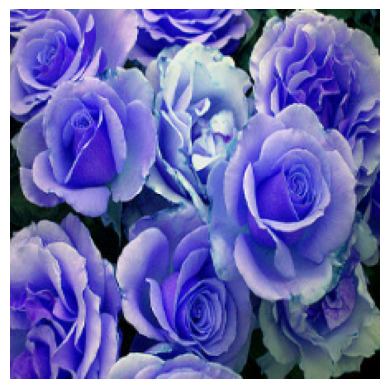

In [44]:
plt.axis('off')
plt.imshow(X[0])

In [46]:
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))

1/1 [==============================] - 3s 3s/step


In [47]:
predicted=np.argmax(predicted,axis=1)
predicted

array([722, 795, 722])

### Now take pre-trained model and retrain it using flowers images

In [48]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [50]:
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable=False
)

In [59]:
num_of_flowers=5
model = tf.keras.Sequential([
    hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False),
    tf.keras.layers.Dense(num_of_flowers)
])
model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7f26f81d75f0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [ ]:
model.compile(optimizer="adad",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])
model.fit(X_train_scaled,y_train,epochs=5)              